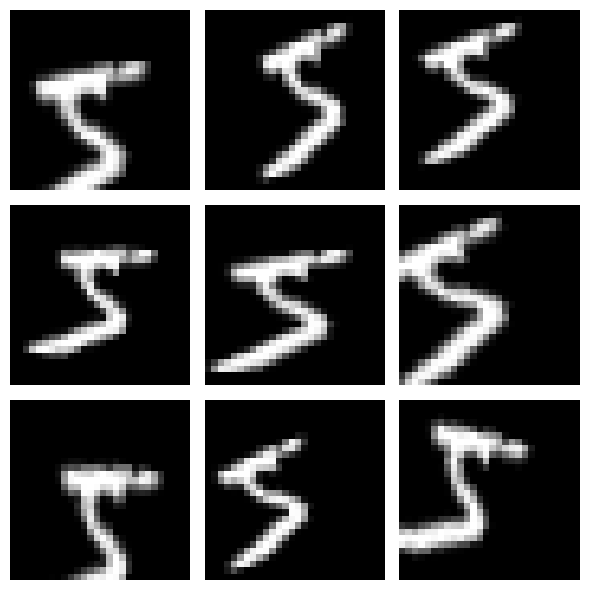

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load MNIST dataset
(x_train, y_train), (_, _) = mnist.load_data()

# Expand dimensions to match expected input shape: (samples, height, width, channels)
x_train = np.expand_dims(x_train, -1)

# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0

# Create an image data generator with augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,         # Random rotation between -20 and 20 degrees
    width_shift_range=0.2,     # Horizontal shift
    height_shift_range=0.2,    # Vertical shift
    zoom_range=0.2             # Random zoom
)

# Take one sample image and create a batch of size 1
sample_image = x_train[0]
sample_image = np.expand_dims(sample_image, 0)  # Shape: (1, 28, 28, 1)

# Generate augmented images using the generator
augmented_images = datagen.flow(sample_image, batch_size=1)

# Display the first 9 augmented images
plt.figure(figsize=(6, 6))
for i in range(9):
    batch = next(augmented_images)
    image = batch[0].squeeze()
    plt.subplot(3, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [26]:
import random
import nltk
from nltk.corpus import wordnet
from deep_translator import GoogleTranslator

nltk.download('wordnet')
nltk.download('omw-1.4')

# Original sentence
sentence = "This movie was good and the acting was fantastic."

# 1. Synonym Replacement
def synonym_replacement(sentence, n=2):
    words = sentence.split()
    new_words = words.copy()
    random.shuffle(words)
    replaced = 0
    for word in words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym_words = [lemma.name() for lemma in synonyms[0].lemmas() if lemma.name() != word]
            if synonym_words:ﬁ
                new_words = [synonym_words[0] if w == word else w for w in new_words]
                replaced += 1
        if replaced >= n:
            break
    return ' '.join(new_words)

# 2. Random Insertion/Deletion
def random_insertion_deletion(sentence, insert_prob=0.3, delete_prob=0.3):
    words = sentence.split()
    new_words = []
    for word in words:
        if random.random() > delete_prob:
            new_words.append(word)
        if random.random() < insert_prob:
            new_words.append("very")  # simple insert
    return ' '.join(new_words)

# 3. Back Translation (via English → German → English)
def back_translation(sentence):
    translated = GoogleTranslator(source='auto', target='de').translate(sentence)
    back_translated = GoogleTranslator(source='de', target='en').translate(translated)
    return back_translated

# Demonstration
print("Original:", sentence)
print("Synonym Replacement:", synonym_replacement(sentence))
print("Random Insertion/Deletion:", random_insertion_deletion(sentence))
print("Back Translation:", back_translation(sentence))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amirhanordobaev/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/amirhanordobaev/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Original: This movie was good and the acting was fantastic.
Synonym Replacement: This movie Washington good and the playing Washington fantastic.
Random Insertion/Deletion: was good and very the very was very fantastic.
Back Translation: This film was good and the spectacle was fantastic.


Before SMOTE: Counter({0: 900, 1: 100})
After SMOTE: Counter({0: 900, 1: 900})


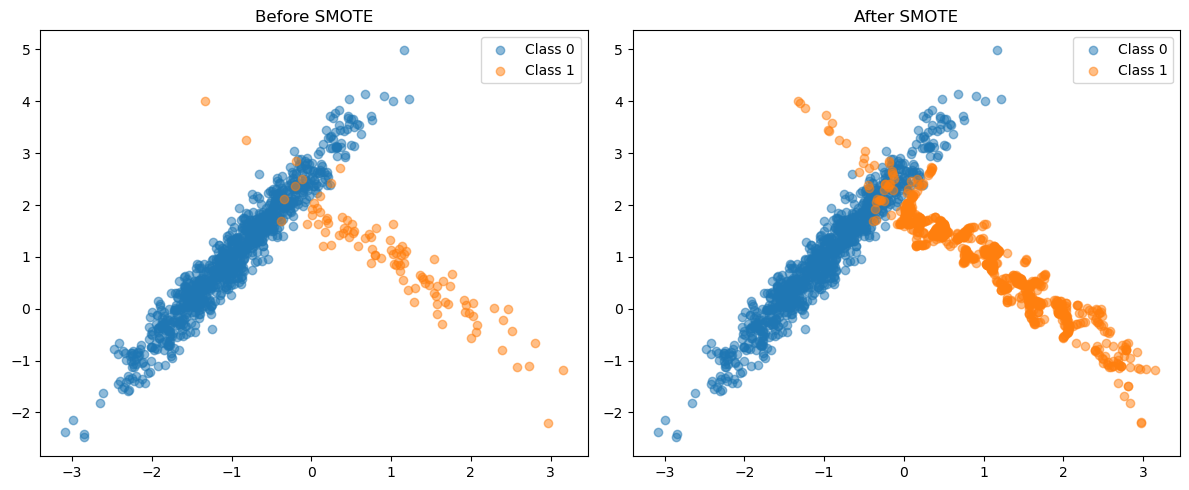

In [28]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

print("Before SMOTE:", Counter(y))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("After SMOTE:", Counter(y_res))

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Before SMOTE")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", alpha=0.5)
plt.legend()

plt.subplot(1, 2, 2)
plt.title("After SMOTE")
plt.scatter(X_res[y_res == 0][:, 0], X_res[y_res == 0][:, 1], label="Class 0", alpha=0.5)
plt.scatter(X_res[y_res == 1][:, 0], X_res[y_res == 1][:, 1], label="Class 1", alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()